<a href="https://colab.research.google.com/github/jsroa15/KKBOX/blob/main/Logs_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logs data

The main idea here is to explore the logs dataset, find how the data is represented, make Exploratory Data Analysis.

**Exploratory Data Analysis**

1.  Load data
2.  General statistics
3.  Data Visualization
4.  Data Cleaning
5.  Fixing formats

**Feature Engineering**

6.  Data Transformation
7.  Outlier detection
8.  Scaling features (optional)
9.  Create a dataframe grouped by user id


# **Exploratory Data Analysis**

## 1. Load data

In [3]:
#Import

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
#Loading data

logs=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KKBOX/logs.csv',nrows=30000000) #Only 30 million rows beacause of laptop memory

In [ ]:
#Explore data

logs.head()


,Unnamed: 0,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,0,rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34=,20150513,0,0,0,0,1,1,280.335
1,1,rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34=,20150709,9,1,0,0,7,11,1658.948
2,2,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,20150105,3,3,0,0,68,36,17364.956
3,3,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,20150306,1,0,1,1,97,27,24667.317
4,4,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,20150501,3,0,0,0,38,38,9649.029


In [5]:
#Drop first column

logs.drop('Unnamed: 0',axis=1,inplace=True)

## 2. General Statistics

In [ ]:
#Datset info

logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000000 entries, 0 to 29999999
Data columns (total 9 columns):
 #   Column      Dtype  
---  ------      -----  
 0   msno        object 
 1   date        int64  
 2   num_25      int64  
 3   num_50      int64  
 4   num_75      int64  
 5   num_985     int64  
 6   num_100     int64  
 7   num_unq     int64  
 8   total_secs  float64
dtypes: float64(1), int64(7), object(1)
memory usage: 2.0+ GB


Date feature as ```int64```, we have to convert it later.

In [ ]:
#Summary statistics

round(logs.describe(),3)


,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
count,3.000000e+07,3.000000e+07,3.000000e+07,3.000000e+07,3.000000e+07,3.000000e+07,3.000000e+07,3.000000e+07
mean,2.015739e+07,6.509000e+00,1.640000e+00,1.017000e+00,1.129000e+00,3.071300e+01,3.007900e+01,-1.434526e+12
std,6.181196e+03,1.450400e+01,4.268000e+00,2.177000e+00,2.924000e+00,4.277000e+01,3.375300e+01,1.152648e+14
min,2.015010e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-9.223372e+15
25%,2.015082e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,8.000000e+00,1.891120e+03
50%,2.016031e+07,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.700000e+01,1.900000e+01,4.626872e+03
75%,2.016091e+07,7.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,3.800000e+01,4.000000e+01,1.026319e+04
max,2.017023e+07,7.112000e+03,9.070000e+02,6.440000e+02,2.417000e+03,3.469600e+04,2.767000e+03,9.223372e+15


From the above we can see that all the features are highly skewed to the right because of the high values. We are gonna see that with histograms in the next section od EDA

In [ ]:
#Checking missing values

print(logs.isna().sum())

msno          0
date          0
num_25        0
num_50        0
num_75        0
num_985       0
num_100       0
num_unq       0
total_secs    0
dtype: int64


## 3. Data Visualization

No missing values in data.

Create a function to plot histograms with numeric features

In [ ]:
def plotting_numerical(data,rows,cols,x_list,size,log=False):
  '''Plot numerical data in subplots using Seaborn
    Parameters
    --------------
      data:Data frame with data
      rows:Number of rows in subplot
      cols:Number of columns in subplot
      x_list:List with features names
      size:Tupple with size of plot
    
  '''
  
  sns.set_style("whitegrid")

  pos=0
  f, axes = plt.subplots(nrows=rows, ncols=cols,figsize=size)
  for i in range(0,rows):
    for j in range(0,cols):
      
      sns.histplot(data=data,ax=axes[i,j],x=x_list[pos],bins=50,log_scale=log)
      pos+=1

  return(plt.show())

In [7]:
#Extracting numerical features

numeric=[x for x in logs.columns if x not in ['msno','date']]
len(numeric)

7

IndexError: ignored

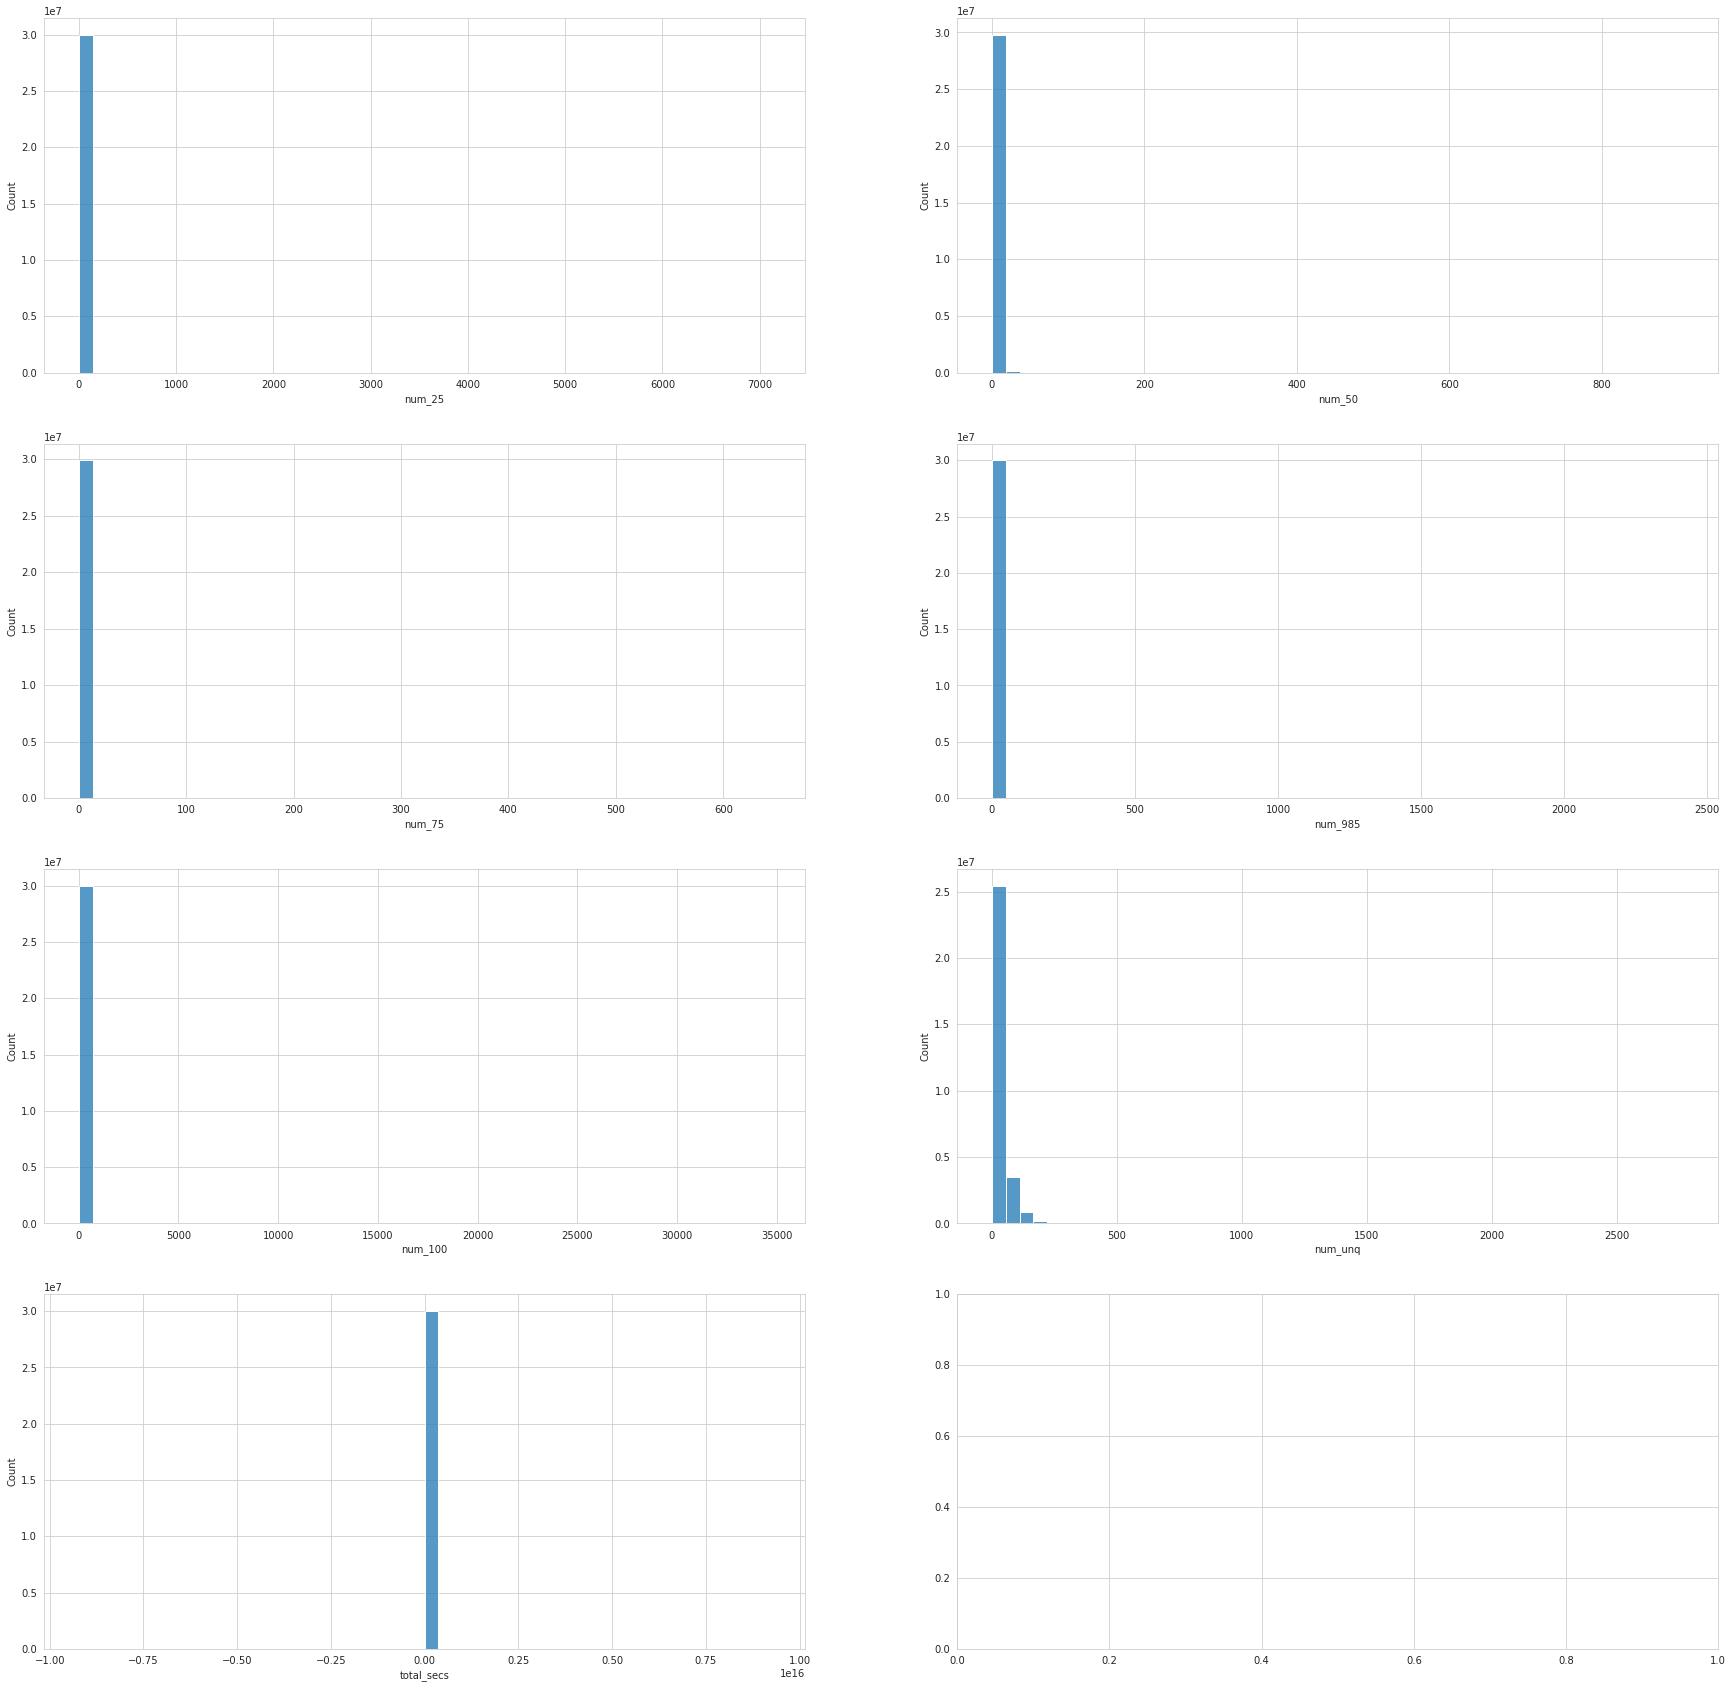

In [ ]:
plotting_numerical(logs,4,2,numeric,(30,30))

In [ ]:
def plotting_numerical_box(data,rows,cols,x_list,size):
  '''Plot numerical data in subplots using Seaborn
    Parameters
    --------------
      data:Data frame with data
      rows:Number of rows in subplot
      cols:Number of columns in subplot
      x_list:List with features names
      size:Tupple with size of plot
    
  '''
  
  sns.set_style("whitegrid")

  pos=0
  f, axes = plt.subplots(nrows=rows, ncols=cols,figsize=size)
  for i in range(0,rows):
    for j in range(0,cols):
      
      sns.boxplot(y=data[x_list[pos]],ax=axes[i,j])
      pos+=1

  return(plt.show())

IndexError: ignored

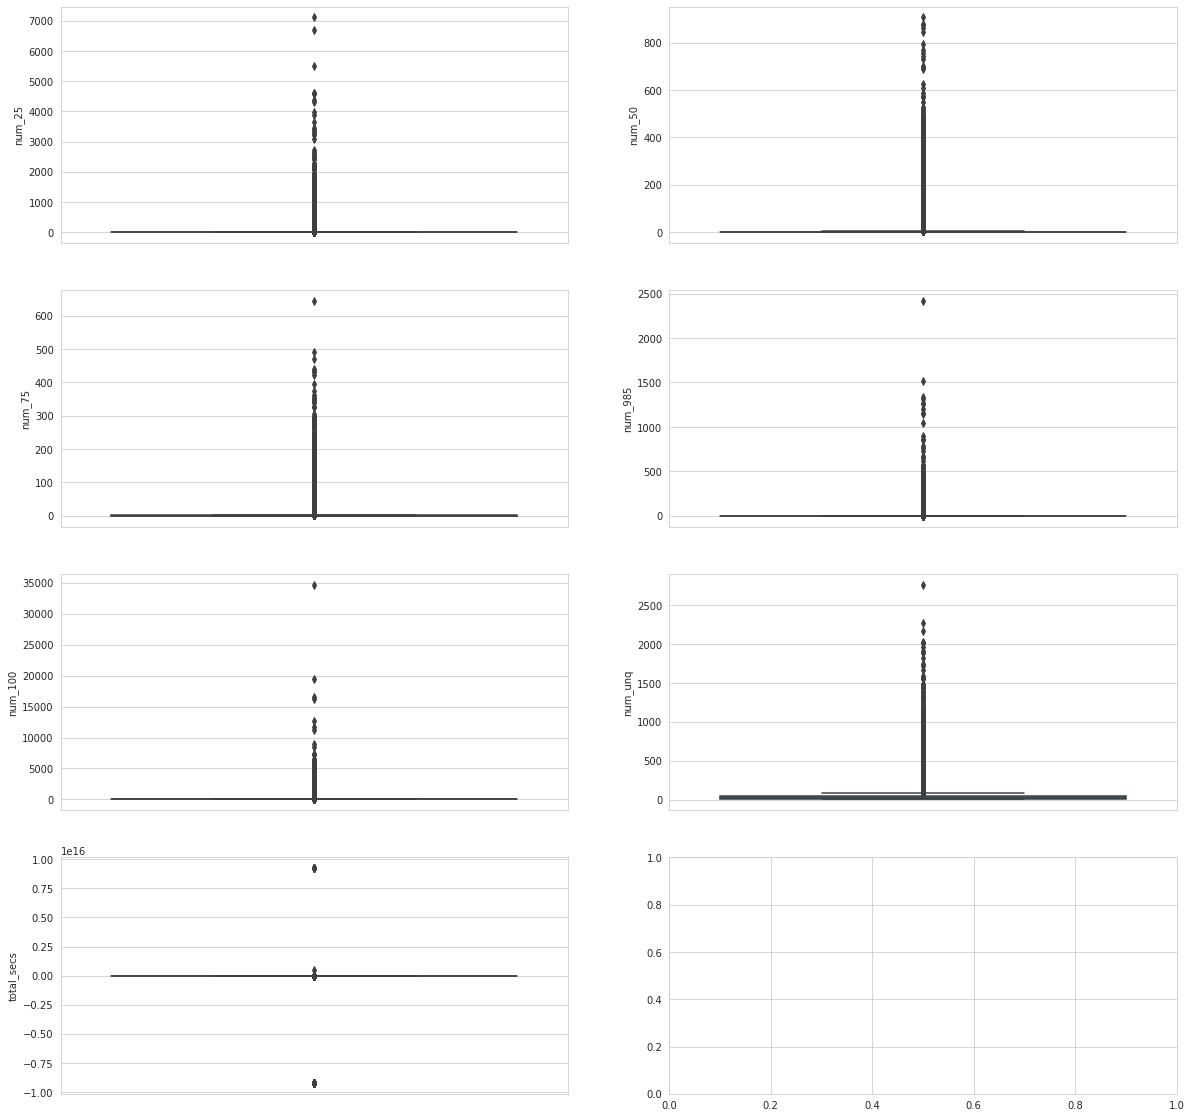

In [ ]:
plotting_numerical_box(logs,4,2,numeric,(20,20))

With histograms and boxplots we can see the data has a great amount of outliers. Feature ```total_secs``` has only few outliers. We are going to transform data with log without ```total_secs``` in later steps.

## 5. Fixing formats

In [ ]:
#Change Date format in Transactions Data Frame

logs.date=logs.date.astype('str')

logs['date']=pd.to_datetime(logs.date,errors='coerce')

In [ ]:
logs.info()

# **Feature Engineering**

## 6. Data Transformation

Now we are going to explore and transform data and see how it looks like.

In [8]:
#Removing total_secs from numeric list

numeric=numeric[0:6]

In [9]:
#Transforming data with log

for i in numeric:
  logs[i]=np.log1p(logs[i])


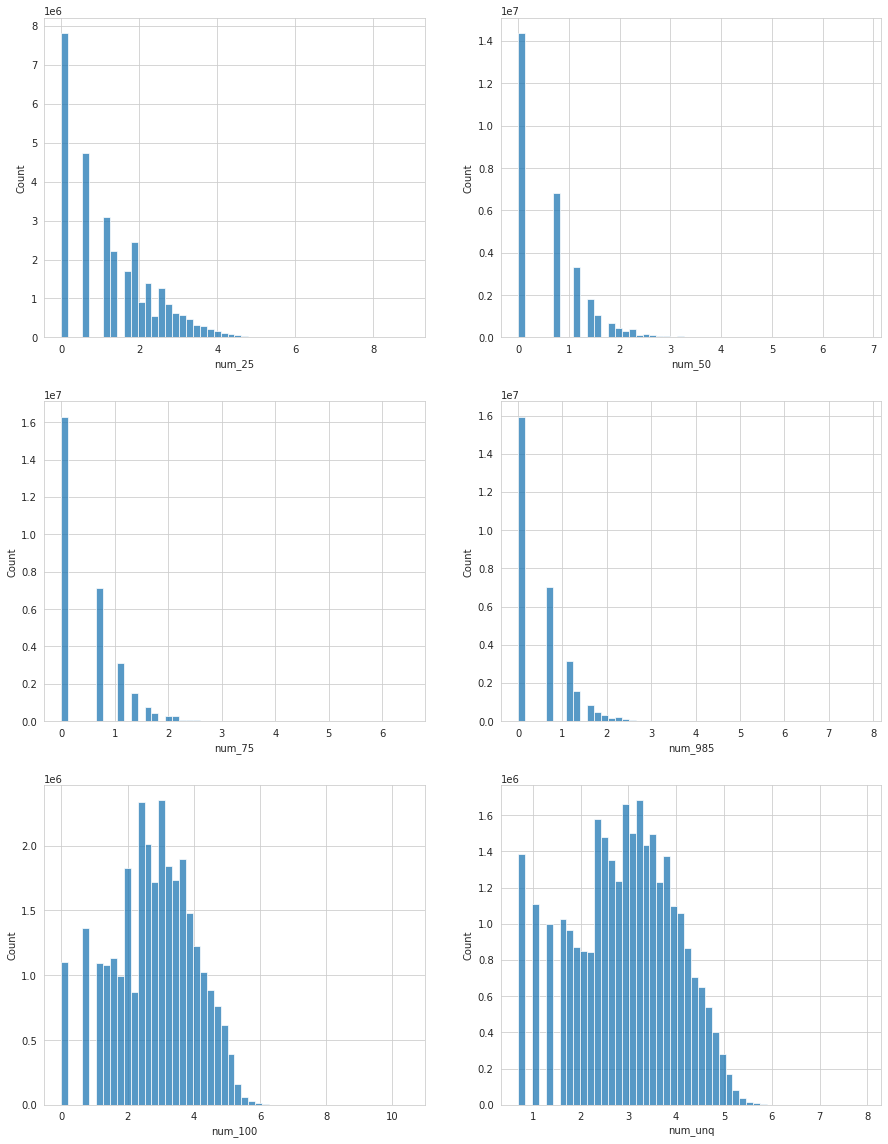

In [ ]:
plotting_numerical(logs,3,2,numeric,(15,20))

Now we have a beter distribution of data and it's possible to detect outliers and replace outliers with the mean of each feature.

## 7. Outlier detection

In [10]:
#Extracting numeric features

numeric=[x for x in logs.columns if x not in ['msno','date']]

In [11]:
#Function to replace outliers with mean

def modify_outliers_mean(data,features):

  '''
  This function modifies outliers with mean.
  First, the function detects outliers with Z-score, then calculates the mean of
  the feature without outliers,and finally, replaces outliers with the calculated
  mean.
  Parameters:
  -------------------
  data: dataset to be analyzed
  features: List of numerical features in the dataset
  '''

  to_del=[]
  for i in features:

    #Initialize null lists
    ind_upper=[]
    ind_lower=[]
    ind=[]

    #Calculate Z score
    data['Z_score']=(data[i]-data[i].mean())/data[i].std()
    print(data[(data['Z_score']>3) | (data['Z_score']<-3)].shape[0],' outliers detected for ',i)
    to_del.append(data[(data['Z_score']>3) | (data['Z_score']<-3)].shape[0])
    
    #Identified outliers
    ind=data[(data['Z_score']>3) | (data['Z_score']<-3)].index
    
    #Calculate mean to replace outlier

    mean_to_replace=data[(data['Z_score']<3) & (data['Z_score']>-3)][i].mean()
    
    #Replacing outliers
    data.loc[ind,i]=mean_to_replace

  print('total outliers modified: ',sum(to_del))
  data.drop(columns='Z_score',inplace=True)

In [12]:
modify_outliers_mean(logs,numeric)

86820  outliers detected for  num_25
314004  outliers detected for  num_50
275645  outliers detected for  num_75
286812  outliers detected for  num_985
2549  outliers detected for  num_100
1469  outliers detected for  num_unq
4687  outliers detected for  total_secs
total outliers modified:  971986


IndexError: ignored

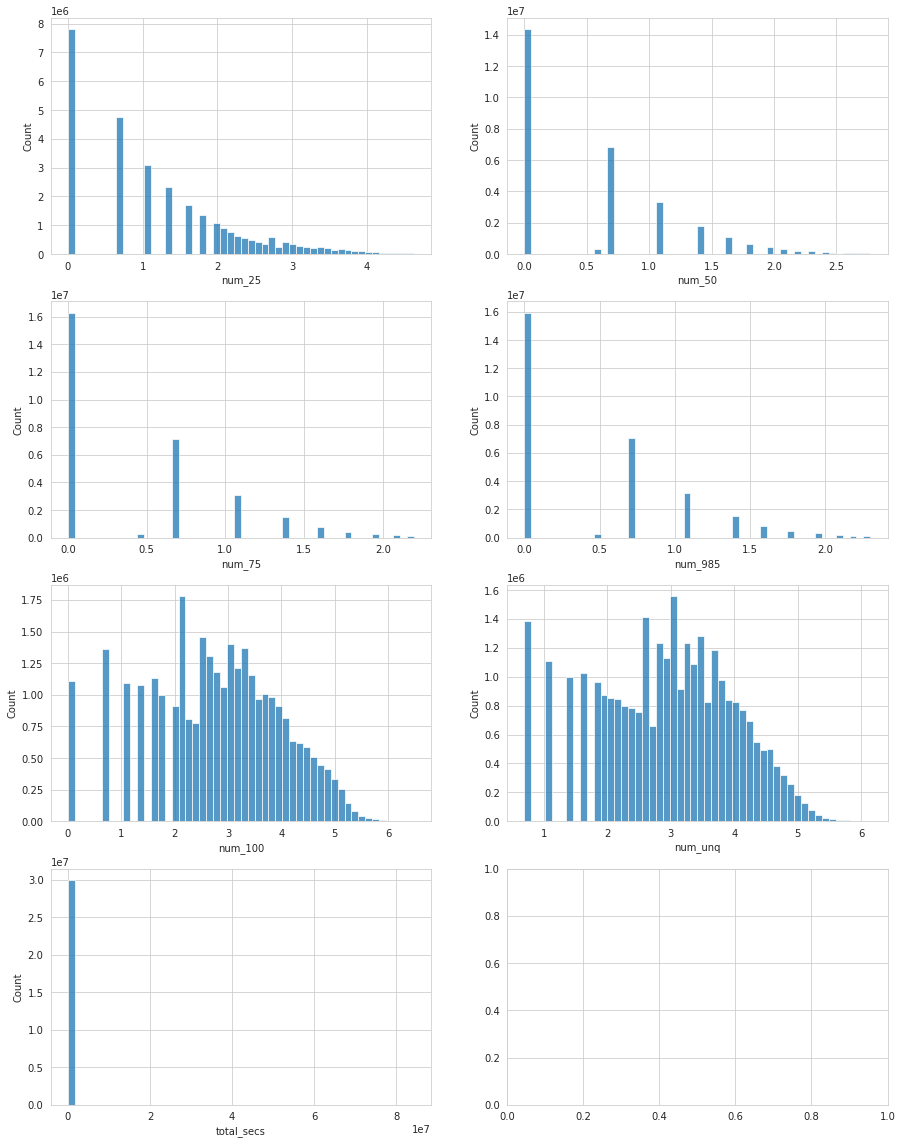

In [ ]:
plotting_numerical(logs,4,2,numeric,(15,20))

In [ ]:
round(logs.describe(),2)

,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
count,30000000.00,30000000.00,30000000.00,30000000.00,30000000.00,30000000.00,30000000.00,30000000.00
mean,20157391.64,1.30,0.58,0.45,0.48,2.79,2.92,8160.50
std,6181.20,1.09,0.67,0.56,0.58,1.23,1.08,29790.24
min,20150101.00,0.00,0.00,0.00,0.00,0.00,0.69,0.00
25%,20150818.00,0.00,0.00,0.00,0.00,1.95,2.20,1892.35
50%,20160312.00,1.10,0.69,0.00,0.00,2.89,3.00,4629.00
75%,20160911.00,2.08,1.10,0.69,0.69,3.66,3.71,10263.18
max,20170228.00,4.62,2.77,2.20,2.30,6.48,6.14,84219768.58


The feature ```total_sec``` still has a extrange behavior. Let's explore deeper.

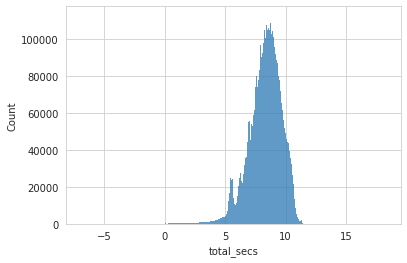

In [ ]:
#Isolating feature for further analysis

secs=logs[['total_secs']]

#Transforming feature

secs['total_secs']=np.log(secs['total_secs'])

#Ploting transformed feature

sns.histplot(data=secs,x='total_secs')

From the above we can conclude that ```total_secs``` has a better shape. We can proceed with transformation.

In [13]:
#Transforming feature

logs['total_secs']=np.log(logs['total_secs'])

In [16]:
#Defining the logs data frame grouped by user

df_logs=logs.groupby(by='msno').mean().reset_index()

df_logs.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,+++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY=,2.016091e+07,1.161098,0.519860,0.447940,0.722593,2.628205,2.729870,8.276067
1,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,2.015567e+07,0.446895,0.227509,0.207076,0.174396,4.410699,4.361185,9.914876
2,+++dz9ZCWE2HB/47pJU82NJXQzQuZDx1Wm50YSk/kKk=,2.016030e+07,0.693147,0.000000,0.000000,0.346574,3.951613,3.860453,9.490026
3,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,2.016565e+07,1.742658,1.283516,1.023586,1.425563,3.037991,3.165746,8.835066
4,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,2.015818e+07,0.450867,0.338582,0.414151,0.428341,2.592852,2.659798,8.068843


In [17]:
#Dropping date feature

df_logs.drop(columns='date',inplace=True)

df_logs.shape

(1822947, 8)

In [18]:
#Exporting df_logs

df_logs.to_csv('/content/drive/MyDrive/Colab Notebooks/KKBOX/df_logs.csv',index=False)